## Pesquisa Nacional por Amostra de Domicílios


passo 1: Importando os dados<br>
passo 2: Análisar os dados<br>
passo 3: Extrair as informações mais importante<br>
passo 4: Fazer análizes mais profundas 

In [2]:
# importação da bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("pnad_2015_clean.csv")
display(df)

,State,Sex,Age,Color,Years_of_study,Income,Height
0,Rondônia,Male,23,Brown,11,800,1.60
1,Rondônia,Female,23,White,11,1150,1.74
2,Rondônia,Female,35,Brown,14,880,1.76
3,Rondônia,Male,46,White,5,3500,1.78
4,Rondônia,Female,47,Brown,8,150,1.69
...,...,...,...,...,...,...,...
76835,Distrito Federal,Female,46,White,10,812,1.69
76836,Distrito Federal,Male,30,Black,6,1500,1.79
76837,Distrito Federal,Male,32,Brown,11,1300,1.83
76838,Distrito Federal,Male,57,Brown,3,1500,1.73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           76840 non-null  object 
 1   Sex             76840 non-null  object 
 2   Age             76840 non-null  int64  
 3   Color           76840 non-null  object 
 4   Years_of_study  76840 non-null  int64  
 5   Income          76840 non-null  int64  
 6   Height          76840 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


In [4]:
# 15 anos é o valor máximo de quem estudou segundo a pesquisa
# a pessoa mais jovem que participou na pesquisa é alguem de 13 anos
# a média de idade por pessoa na pesquisa é de 44 anos
df.describe()

,Age,Years_of_study,Income,Height
count,76840.000000,76840.000000,76840.000000,76840.000000
mean,44.071421,8.429893,2000.383199,1.699508
std,12.480583,4.543868,3323.387730,0.079788
min,13.000000,0.000000,0.000000,1.340000
25%,34.000000,5.000000,788.000000,1.650000
50%,43.000000,9.000000,1200.000000,1.700000
75%,53.000000,11.000000,2000.000000,1.750000
max,99.000000,15.000000,200000.000000,2.030000


In [5]:
# Porcentagem da raça dos dodas levantados

df['Color'].value_counts()
df['Color'].value_counts(normalize=True).map('{:.2%}'.format)

Brown         46.75%
White         41.40%
Black         10.92%
Indigenous     0.46%
Yellow         0.46%
Name: Color, dtype: object

In [6]:
# média da idade dos participante da pequisa
df['Age'].mean()

44.07142113482561

<AxesSubplot:xlabel='Years_of_study', ylabel='Income'>

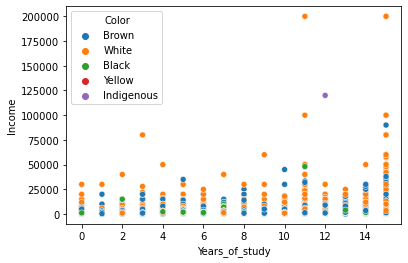

In [7]:
# Próximo
sns.scatterplot(data=df, x='Years_of_study', y='Income', hue="Color")

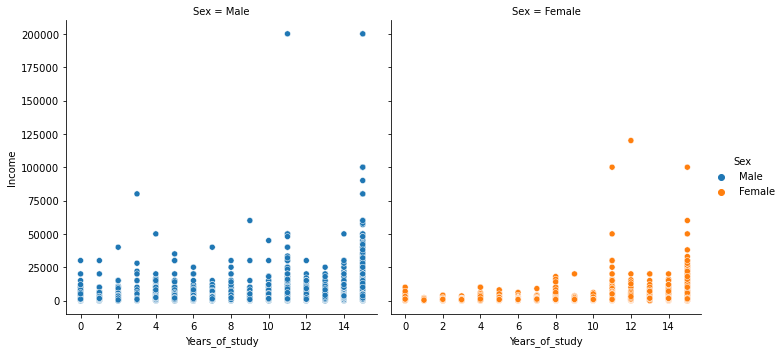

In [8]:
# Comparação entre os sexos em relção aos anos de estudo
fig = sns.relplot(data=df, x='Years_of_study', y='Income', hue="Sex", col='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Years_of_study'>

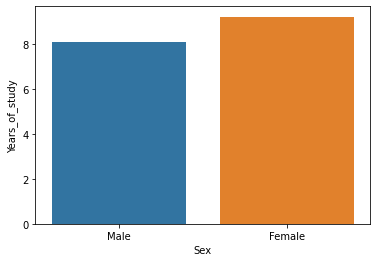

In [9]:
# Próximo
sns.barplot(data=df, x='Sex', y='Years_of_study', ci=None)

In [10]:
estado = df['State'].value_counts()

In [11]:
estado[:10]

São Paulo            8544
Minas Gerais         7686
Rio Grande do Sul    6322
Bahia                5717
Rio de Janeiro       5556
Pará                 4449
Paraná               4356
Pernambuco           3820
Goiás                3478
Ceará                3359
Name: State, dtype: int64

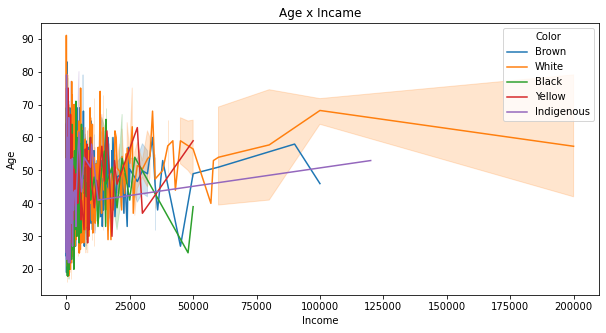

In [12]:
# Próximo... 
plt.figure(figsize=(10,5))
graf = sns.lineplot(data=df, x="Income", y="Age", hue='Color')
graf.set_title("Age x Incame")
plt.show()

In [13]:
# Agrupando as dados das coluna de Cor e Sexo e as médias
df.groupby(["Color", "Sex"]).mean()

Age  Years_of_study       Income    Height
Color      Sex                                                     
Black      Female  43.954656        8.455867  1134.596400  1.698082
           Male    43.161759        7.488368  1603.861687  1.700745
Brown      Female  43.497698        8.454428  1176.758516  1.699388
           Male    43.291106        7.291625  1659.577425  1.699218
Indigenous Female  44.564356        7.792079  2464.386139  1.698614
           Male    42.242188        6.812500  1081.710938  1.701094
White      Female  44.880158       10.252676  2109.866750  1.700437
           Male    45.107957        9.115121  2925.744435  1.699380
Yellow     Female  44.606838       11.495726  3027.341880  1.702650
           Male    47.055319       11.587234  4758.251064  1.695957

In [14]:
# Next
df[["Color", "Sex"]].groupby(by=['Color'])['Sex'].apply(list)

Color
Black         [Female, Male, Female, Male, Female, Male, Mal...
Brown         [Male, Female, Female, Female, Male, Female, M...
Indigenous    [Male, Female, Male, Female, Male, Female, Mal...
White         [Female, Male, Female, Male, Male, Male, Male,...
Yellow        [Male, Male, Male, Female, Male, Male, Female,...
Name: Sex, dtype: object

In [15]:
df['Color'].value_counts()

Brown         35925
White         31815
Black          8391
Indigenous      357
Yellow          352
Name: Color, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Color'>

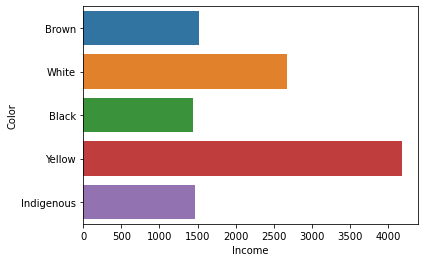

In [16]:
# As pessos que se indentificam como Color Yellow possuem uma renda maior , seguido de write
sns.barplot(data=df, x='Income', y='Color', ci=None)

<AxesSubplot:xlabel='Color', ylabel='Income'>

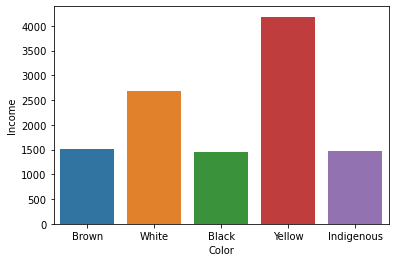

In [17]:
# Análise cor renda
sns.barplot(data=df, x='Color', y='Income', ci=None)

<AxesSubplot:xlabel='Color', ylabel='Years_of_study'>

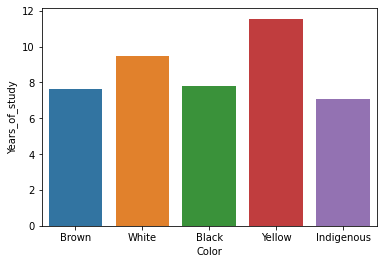

In [18]:
sns.barplot(data=df, x='Color', y='Years_of_study', ci=None)

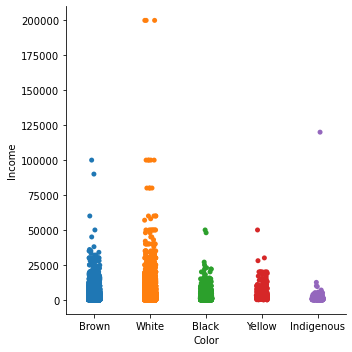

In [19]:
sns.catplot(data=df, x='Color', y='Income')

In [20]:
# Média da idade por raça no levantamento
df.groupby('Color')['Age'].mean()

Color
Black         43.434752
Brown         43.353570
Indigenous    42.899160
White         45.039070
Yellow        46.241477
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Income'>

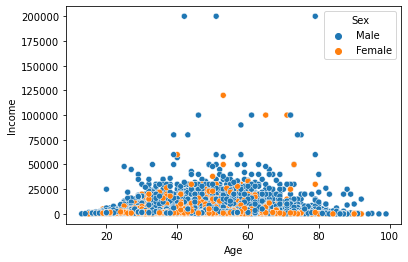

In [21]:
# renda x anos
sns.scatterplot(data=df, x='Age', y='Income', hue='Sex')

### Análise por Estado

<AxesSubplot:xlabel='Income', ylabel='State'>

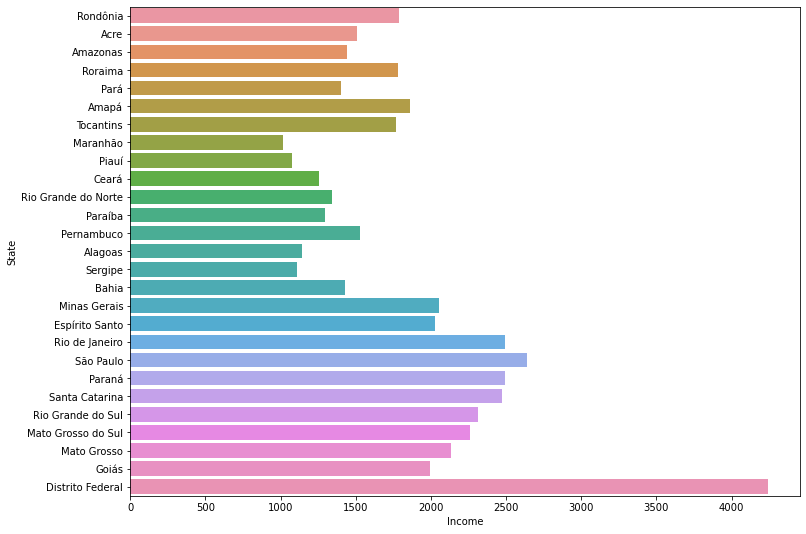

In [22]:
# Rendo por Estado
# Distrito Federal apresenta o maior número de pessoas que  tem a renda acoma da media, Maranhão apresenta a menor media
plt.figure(figsize=(12,9))
sns.barplot(data=df, x='Income', y='State', ci=None)

In [23]:
renda = df[["State", "Income"]].groupby(["State"]).sum()

In [24]:
# São Paulo teve a moior participação nessa pesquisa seguido Minas Gerais
df['State'].value_counts()[:5]

São Paulo            8544
Minas Gerais         7686
Rio Grande do Sul    6322
Bahia                5717
Rio de Janeiro       5556
Name: State, dtype: int64

In [25]:
# com isso teve a maior renda no Levantamento da Pesquisa
renda.sort_values('Income')

,Income
State,
Amapá,953013
Roraima,963138
Alagoas,1033531
Piauí,1301281
Rio Grande do Norte,1308414
Acre,1411208
Sergipe,1427426
Paraíba,1647754
Maranhão,1821725
